## Exploring and pre-processing data: NSTEMI data

General process:
- Loading clinical data (separately)
- Review % missing data
- Remove features when percentage of missing data >=90%
- Review continuos features to identify outliers
- Fix outliers
- Review categorical features to identify empty values

In [1]:
#Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Pre-processing: demographic data

In [2]:
#Loading data(separately)
age = pd.read_csv("../data/nstemi/age.csv")
demo = pd.read_csv("../data/nstemi/demo.csv")

In [3]:
#Review age
age.describe()

,subject_id,hadm_id,age
count,2820.000000,2820.00000,2820.000000
mean,32924.519149,151312.17234,88.605085
std,27897.961837,29210.70230,62.725756
min,3.000000,100036.00000,20.170000
25%,11794.250000,125440.00000,63.822500
50%,23409.500000,151110.00000,74.080000
75%,52228.250000,177705.00000,82.130000
max,99944.000000,199984.00000,311.560000


(array([ 147., 1636.,  817.,    0.,    0.,    0.,    0.,    0.,    0.,
         220.]),
 array([ 20.17 ,  49.309,  78.448, 107.587, 136.726, 165.865, 195.004,
        224.143, 253.282, 282.421, 311.56 ]),
 <a list of 10 Patch objects>)

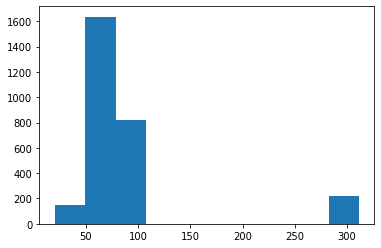

In [4]:
plt.hist(age.age)

In [5]:
#Fix outliers (age)
age['age']=np.where(age['age']>=300,age['age']*90/300,age['age'])
age.describe()

,subject_id,hadm_id,age
count,2820.000000,2820.00000,2820.000000
mean,32924.519149,151312.17234,72.192662
std,27897.961837,29210.70230,12.637562
min,3.000000,100036.00000,20.170000
25%,11794.250000,125440.00000,63.822500
50%,23409.500000,151110.00000,74.080000
75%,52228.250000,177705.00000,82.130000
max,99944.000000,199984.00000,93.468000


In [6]:
#Convert gender to one-hot-encoding
age["sex"] = np.where(age['gender']=="M",1,0)
age["sex"].value_counts()

1    1644
0    1176
Name: sex, dtype: int64

In [7]:
#Adding age + sex + label to demographic data
demo["Sex"] = age["sex"]
demo["Age"] = age["age"]
print("demo:",demo.shape)

demo: (2820, 14)


In [8]:
demo.describe()

,subject_id,hadm_id,icustay_id,los,adm_elective,adm_emergency,adm_urgent,status_divorced,status_married,status_single,status_widow,weight_admit,Sex,Age
count,2820.000000,2820.00000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2255.000000,2820.000000,2820.000000
mean,32924.519149,151312.17234,250485.435816,5.128446,0.039362,0.918440,0.042199,0.057801,0.529787,0.146454,0.202482,79.651951,0.582979,72.192662
std,27897.961837,29210.70230,29027.612165,6.171771,0.194488,0.273742,0.201078,0.233409,0.499200,0.353623,0.401921,19.945442,0.493154,12.637562
min,3.000000,100036.00000,200066.000000,1.000200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.700000,0.000000,20.170000
25%,11794.250000,125440.00000,225436.500000,1.889400,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.699997,0.000000,63.822500
50%,23409.500000,151110.00000,250560.500000,3.109850,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,78.100000,1.000000,74.080000
75%,52228.250000,177705.00000,275569.000000,5.687125,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,91.000000,1.000000,82.130000
max,99944.000000,199984.00000,299969.000000,61.021300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,230.000000,1.000000,93.468000


In [9]:
#Renaming names:
demo = demo.rename(columns={'los': 'Length of stay',
                           'weight_admit':'Weight at admission'})

In [10]:
demo.shape

(2820, 14)

### Preprocessing: complications data

In [11]:
comp = pd.read_csv("../data/nstemi/complications.csv")
leads = pd.read_csv("../data/nstemi/leads_depression.csv")

In [12]:
#Concatenate leads + complications set
leads_complications = pd.concat([leads, comp])

In [13]:
#Fix multiple rows for each patient
result = leads_complications.groupby(['subject_id','hadm_id','icustay_id'])
complications = result.sum().reset_index()

In [14]:
complications.describe()

,subject_id,hadm_id,icustay_id,i_lead,ii_lead,iii_lead,v1_lead,v2_lead,v3_lead,v4_lead,...,renal_failure,angina,cerebrovascular_accident,cardiac_arrest,congestive_heart_failure,chronic_airway_obstruction,aneurysm,diabetes,rbbb_flag,lbbb_flag
count,2820.000000,2820.00000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,...,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000
mean,32924.519149,151312.17234,250485.435816,0.036525,0.024113,0.014184,0.006383,0.026596,0.037589,0.058865,...,0.269504,0.012411,0.062411,0.045035,0.519504,0.105319,0.003191,0.283688,0.254255,0.252482
std,27897.961837,29210.70230,29027.612165,0.187625,0.153429,0.118272,0.079652,0.160927,0.190233,0.235414,...,0.443781,0.110732,0.241944,0.207419,0.499708,0.307019,0.056413,0.450867,0.920905,0.962996
min,3.000000,100036.00000,200066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11794.250000,125440.00000,225436.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23409.500000,151110.00000,250560.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52228.250000,177705.00000,275569.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,99944.000000,199984.00000,299969.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,7.000000


In [15]:
#One-hot encoding to all variables
complications['rv']=np.where(complications['rv']>=1,1,0)
complications['free_wall_rupture']=np.where(complications['free_wall_rupture']>=1,1,0)
complications['pulmonary_edema']=np.where(complications['pulmonary_edema']>=1,1,0)
complications['mid_lateral']=np.where(complications['mid_lateral']>=1,1,0)
complications['lvh']=np.where(complications['lvh']>=1,1,0)
complications['qrs']=np.where(complications['qrs']>=1,1,0)
complications['anterior']=np.where(complications['anterior']>=1,1,0)
complications['lv']=np.where(complications['lv']>=1,1,0)
complications['septal_rupture']=np.where(complications['septal_rupture']>=1,1,0)
complications['inferior']=np.where(complications['inferior']>=1,1,0)
complications['r_wave']=np.where(complications['r_wave']>=1,1,0)
complications['l']=np.where(complications['l']>=1,1,0)
complications['qt_t']=np.where(complications['qt_t']>=1,1,0)
complications['v']=np.where(complications['v']>=1,1,0)
complications['rv']=np.where(complications['rv']>=1,1,0)
complications['inverted_t_waves']=np.where(complications['inverted_t_waves']>=1,1,0)
complications['avr_lead']=np.where(complications['avr_lead']>=1,1,0)
complications['inferolateral']=np.where(complications['inferolateral']>=1,1,0)
complications['precordial']=np.where(complications['precordial']>=1,1,0)
complications['pericarditis']=np.where(complications['pericarditis']>=1,1,0)
complications['aneurysm']=np.where(complications['aneurysm']>=1,1,0)
complications['anterolateral']=np.where(complications['anterolateral']>=1,1,0)
complications['v1_lead']=np.where(complications['v1_lead']>=1,1,0)
complications['lateral_']=np.where(complications['lateral_']>=1,1,0)
complications['t_wave']=np.where(complications['t_wave']>=1,1,0)
complications['avf_lead']=np.where(complications['avf_lead']>=1,1,0)
complications['iii_lead']=np.where(complications['iii_lead']>=1,1,0)
complications['mitral_regurgitation']=np.where(complications['mitral_regurgitation']>=1,1,0)
complications['av_block']=np.where(complications['av_block']>=1,1,0)
complications['angina']=np.where(complications['angina']>=1,1,0)
complications['v2_lead']=np.where(complications['v2_lead']>=1,1,0)
complications['ii_lead']=np.where(complications['ii_lead']>=1,1,0)
complications['v3_lead']=np.where(complications['v3_lead']>=1,1,0)
complications['ventricular_fibrillation']=np.where(complications['ventricular_fibrillation']>=1,1,0)
complications['avl_lead']=np.where(complications['avl_lead']>=1,1,0)
complications['atrial_fibrillation']=np.where(complications['atrial_fibrillation']>=1,1,0)
complications['i_lead']=np.where(complications['i_lead']>=1,1,0)
complications['cardiac_arrest']=np.where(complications['cardiac_arrest']>=1,1,0)
complications['i_lead']=np.where(complications['i_lead']>=1,1,0)
complications['v6_lead']=np.where(complications['v6_lead']>=1,1,0)
complications['v4_lead']=np.where(complications['v4_lead']>=1,1,0)
complications['v1_lead']=np.where(complications['v1_lead']>=1,1,0)
complications['cerebrovascular_accident']=np.where(complications['cerebrovascular_accident']>=1,1,0)
complications['v5_lead']=np.where(complications['v5_lead']>=1,1,0)
complications['ventricular_tachycardia']=np.where(complications['ventricular_tachycardia']>=1,1,0)
complications['cardiogenic_shock']=np.where(complications['cardiogenic_shock']>=1,1,0)
complications['chronic_airway_obstruction']=np.where(complications['chronic_airway_obstruction']>=1,1,0)
complications['lbbb_flag']=np.where(complications['lbbb_flag']>=1,1,0)
complications['rbbb_flag']=np.where(complications['rbbb_flag']>=1,1,0)
complications['renal_failure']=np.where(complications['renal_failure']>=1,1,0)
complications['diabetes']=np.where(complications['diabetes']>=1,1,0)
complications['atrial_fibrillation']=np.where(complications['atrial_fibrillation']>=1,1,0)
complications['congestive_heart_failure']=np.where(complications['congestive_heart_failure']>=1,1,0)

In [16]:
complications.describe()

,subject_id,hadm_id,icustay_id,i_lead,ii_lead,iii_lead,v1_lead,v2_lead,v3_lead,v4_lead,...,renal_failure,angina,cerebrovascular_accident,cardiac_arrest,congestive_heart_failure,chronic_airway_obstruction,aneurysm,diabetes,rbbb_flag,lbbb_flag
count,2820.000000,2820.00000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,...,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000
mean,32924.519149,151312.17234,250485.435816,0.036525,0.024113,0.014184,0.006383,0.026596,0.037589,0.058865,...,0.269504,0.012411,0.062411,0.045035,0.519504,0.105319,0.003191,0.283688,0.084397,0.074468
std,27897.961837,29210.70230,29027.612165,0.187625,0.153429,0.118272,0.079652,0.160927,0.190233,0.235414,...,0.443781,0.110732,0.241944,0.207419,0.499708,0.307019,0.056413,0.450867,0.278032,0.262578
min,3.000000,100036.00000,200066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11794.250000,125440.00000,225436.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23409.500000,151110.00000,250560.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52228.250000,177705.00000,275569.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,99944.000000,199984.00000,299969.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
#Renaming names:
complications = complications.rename(columns={'cardiogenic_shock': 'Cardiogenic shock',
                                               'renal_failure':'Renal failure',
                                               'cardiac_arrest':'Cardiac arrest'})

In [19]:
complications.shape

(2820, 40)

### Preprocessing: procedures data

In [20]:
procedures = pd.read_csv("../data/nstemi/procedures.csv")
endotrach_tube = pd.read_csv("../data/nstemi/endotrach_tube.csv")
ventilation = pd.read_csv("../data/nstemi/ventilation.csv")

In [21]:
#Concat procedures + endotrach_tube set + vwntilation
proc = pd.concat([procedures, endotrach_tube,ventilation])

In [22]:
#Fix multiple rows for each patient
result = proc.groupby(['subject_id','hadm_id','icustay_id'])
proc = result.sum().reset_index()

In [23]:
proc.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'coronary_arteriography',
       'injection_or_infusion_of_platelet_inhibitor',
       'combined_right_and_left_heart_cardiac_catheterization',
       'replacement_of_tracheostomy_tube',
       'insertion_of_non_drug_eluting_coronary_artery_stent',
       'insertion_of_drug_eluting_coronary_artery_stent',
       'angiocardiography_of_left_heart_structures',
       'insertion_of_endotracheal_tube',
       'extracorporeal_circulation_auxiliary_to_open_heart_surgery',
       'implant_of_pulsation_balloon', 'venous_catheterization', 'bypass',
       'angiocardiography_of_right_heart_structures',
       'arterial_catheterization',
       'insertion_of_temporary_transvenous_pacemaker_system', 'endotrachflag',
       'vent'],
      dtype='object')

In [24]:
#One-hot encoding to all variables
proc['coronary_arteriography']=np.where(proc['coronary_arteriography']>=1,1,0)
proc['injection_or_infusion_of_platelet_inhibitor']=np.where(proc['injection_or_infusion_of_platelet_inhibitor']>=1,1,0)
proc['combined_right_and_left_heart_cardiac_catheterization']=np.where(proc['combined_right_and_left_heart_cardiac_catheterization']>=1,1,0)
proc['replacement_of_tracheostomy_tube']=np.where(proc['replacement_of_tracheostomy_tube']>=1,1,0)
proc['insertion_of_non_drug_eluting_coronary_artery_stent']=np.where(proc['insertion_of_non_drug_eluting_coronary_artery_stent']>=1,1,0)
proc['insertion_of_drug_eluting_coronary_artery_stent']=np.where(proc['insertion_of_drug_eluting_coronary_artery_stent']>=1,1,0)
proc['angiocardiography_of_left_heart_structures']=np.where(proc['angiocardiography_of_left_heart_structures']>=1,1,0)
proc['insertion_of_endotracheal_tube']=np.where(proc['insertion_of_endotracheal_tube']>=1,1,0)
proc['extracorporeal_circulation_auxiliary_to_open_heart_surgery']=np.where(proc['extracorporeal_circulation_auxiliary_to_open_heart_surgery']>=1,1,0)
proc['implant_of_pulsation_balloon']=np.where(proc['implant_of_pulsation_balloon']>=1,1,0)
proc['venous_catheterization']=np.where(proc['venous_catheterization']>=1,1,0)
proc['bypass']=np.where(proc['bypass']>=1,1,0)
proc['angiocardiography_of_right_heart_structures']=np.where(proc['angiocardiography_of_right_heart_structures']>=1,1,0)
proc['endotrachflag']=np.where(proc['endotrachflag']>=1,1,0)
proc['vent']=np.where(proc['vent']>=1,1,0)

In [25]:
proc = proc.rename(columns={'bypass': 'Bypass',
                           'vent':'Ventilation'})

In [26]:
proc.shape

(2820, 20)

### Pre-processing: arterial blood gas data

In [27]:
blood_gas = pd.read_csv("../data/nstemi/arterial_blood_gas.csv")
blood_gas.describe()

,subject_id,hadm_id,icustay_id,alveolar_arterial_gradient_avg,baseexcess_avg,bicarbonate_avg,totalco2_avg,chloride_avg,calcium_avg,lactate_avg,...,chloride_max,calcium_max,lactate_max,o2flow_max,fio2_max,so2_max,pco2_max,ph_max,po2_max,temperature_max
count,2820.000000,2820.00000,2820.000000,399.00000,1830.000000,58.000000,1829.000000,503.000000,1326.000000,1326.000000,...,503.000000,1326.000000,1326.000000,146.000000,794.000000,1363.000000,1829.000000,1880.000000,1829.000000,830.00000
mean,32924.519149,151312.17234,250485.435816,442.39002,-1.297022,21.913793,24.383842,106.532494,1.142797,2.294654,...,107.208748,1.273748,2.795724,12.864384,74.478212,93.850330,46.079825,7.425027,247.787862,37.28759
std,27897.961837,29210.70230,29027.612165,115.93101,4.220428,5.963440,4.637616,4.817749,0.442301,1.770779,...,4.956601,2.607901,2.403641,24.721853,25.842922,25.034359,10.396261,0.068209,133.088406,1.37100
min,3.000000,100036.00000,200066.000000,144.00000,-25.000000,5.000000,8.000000,87.000000,0.717143,0.500000,...,87.000000,0.720000,0.500000,1.500000,0.700000,43.000000,21.000000,6.930000,21.000000,10.00000
25%,11794.250000,125440.00000,225436.500000,359.50000,-3.250000,19.000000,21.900000,104.000000,1.090000,1.400000,...,104.000000,1.130000,1.500000,3.000000,50.000000,96.000000,40.000000,7.390000,128.000000,36.70000
50%,23409.500000,151110.00000,250560.500000,444.50000,-0.833333,22.000000,24.375000,106.000000,1.130000,1.850000,...,107.000000,1.190000,2.100000,4.000000,80.000000,98.000000,45.000000,7.430000,227.000000,37.20000
75%,52228.250000,177705.00000,275569.000000,544.00000,1.000000,25.750000,27.000000,109.833333,1.176667,2.600000,...,110.000000,1.260000,3.200000,7.500000,100.000000,98.000000,51.000000,7.470000,364.000000,38.00000
max,99944.000000,199984.00000,299969.000000,651.50000,19.000000,37.000000,51.000000,128.000000,16.946667,24.600000,...,128.000000,96.000000,28.800000,100.000000,100.000000,925.000000,123.000000,7.660000,594.000000,40.60000


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,  11., 605., 213.]),
 array([10.  , 13.06, 16.12, 19.18, 22.24, 25.3 , 28.36, 31.42, 34.48,
        37.54, 40.6 ]),
 <a list of 10 Patch objects>)

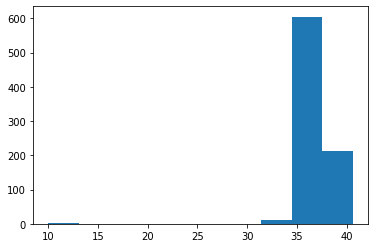

In [28]:
#Checking outliers
plt.hist(blood_gas.temperature_avg)

In [29]:
#Fix features values
blood_gas['baseexcess_avg']=np.where(blood_gas['baseexcess_avg']<0,0,blood_gas['baseexcess_avg'])
blood_gas['temperature_avg']=np.where(blood_gas['temperature_avg']<32,32,blood_gas['temperature_avg'])
blood_gas['baseexcess_min']=np.where(blood_gas['baseexcess_min']<0,0,blood_gas['baseexcess_min'])
blood_gas['temperature_max']=np.where(blood_gas['temperature_max']<32,32,blood_gas['temperature_max'])
blood_gas['baseexcess_max']=np.where(blood_gas['baseexcess_max']<0,0,blood_gas['baseexcess_max'])
blood_gas['temperature_min']=np.where(blood_gas['temperature_min']<32,32,blood_gas['temperature_min'])

(array([  2.,   1.,   9.,  16., 119., 319., 270.,  72.,  19.,   3.]),
 array([32.  , 32.86, 33.72, 34.58, 35.44, 36.3 , 37.16, 38.02, 38.88,
        39.74, 40.6 ]),
 <a list of 10 Patch objects>)

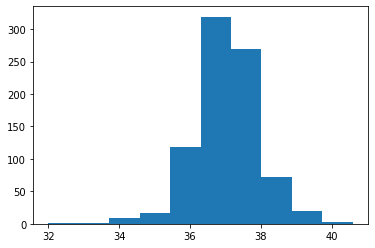

In [30]:
plt.hist(blood_gas.temperature_avg)

In [31]:
blood_gas.describe()

,subject_id,hadm_id,icustay_id,alveolar_arterial_gradient_avg,baseexcess_avg,bicarbonate_avg,totalco2_avg,chloride_avg,calcium_avg,lactate_avg,...,chloride_max,calcium_max,lactate_max,o2flow_max,fio2_max,so2_max,pco2_max,ph_max,po2_max,temperature_max
count,2820.000000,2820.00000,2820.000000,399.00000,1830.000000,58.000000,1829.000000,503.000000,1326.000000,1326.000000,...,503.000000,1326.000000,1326.000000,146.000000,794.000000,1363.000000,1829.000000,1880.000000,1829.000000,830.000000
mean,32924.519149,151312.17234,250485.435816,442.39002,0.896946,21.913793,24.383842,106.532494,1.142797,2.294654,...,107.208748,1.273748,2.795724,12.864384,74.478212,93.850330,46.079825,7.425027,247.787862,37.314096
std,27897.961837,29210.70230,29027.612165,115.93101,1.984881,5.963440,4.637616,4.817749,0.442301,1.770779,...,4.956601,2.607901,2.403641,24.721853,25.842922,25.034359,10.396261,0.068209,133.088406,1.007203
min,3.000000,100036.00000,200066.000000,144.00000,0.000000,5.000000,8.000000,87.000000,0.717143,0.500000,...,87.000000,0.720000,0.500000,1.500000,0.700000,43.000000,21.000000,6.930000,21.000000,32.000000
25%,11794.250000,125440.00000,225436.500000,359.50000,0.000000,19.000000,21.900000,104.000000,1.090000,1.400000,...,104.000000,1.130000,1.500000,3.000000,50.000000,96.000000,40.000000,7.390000,128.000000,36.700000
50%,23409.500000,151110.00000,250560.500000,444.50000,0.000000,22.000000,24.375000,106.000000,1.130000,1.850000,...,107.000000,1.190000,2.100000,4.000000,80.000000,98.000000,45.000000,7.430000,227.000000,37.200000
75%,52228.250000,177705.00000,275569.000000,544.00000,1.000000,25.750000,27.000000,109.833333,1.176667,2.600000,...,110.000000,1.260000,3.200000,7.500000,100.000000,98.000000,51.000000,7.470000,364.000000,38.000000
max,99944.000000,199984.00000,299969.000000,651.50000,19.000000,37.000000,51.000000,128.000000,16.946667,24.600000,...,128.000000,96.000000,28.800000,100.000000,100.000000,925.000000,123.000000,7.660000,594.000000,40.600000


In [32]:
#Renaming names:
blood_gas = blood_gas.rename(columns={'baseexcess_avg': 'Avg. base excess',
                                     'bicarbonate_avg': 'Avg. bicarbonate',
                                     'totalco2_avg': 'Avg. total co2',
                                     'chloride_avg': 'Avg. chloride',
                                     'calcium_avg': 'Avg. calcium',
                                     'lactate_avg': 'Avg. lactate',
                                     'o2flow_avg': 'Avg. O2 flow',
                                     'fio2_avg': 'Avg. FiO2',
                                     'so2_avg': 'Avg. SO2',
                                     'pco2_avg': 'Avg. PCO2',
                                     'ph_Avg. ': 'Avg. pH',
                                     'po2_avg': 'Avg. pO2',
                                     'po2_max': 'Max. pO2',
                                     'temperature_avg': 'Avg. temperature',
                                     'temperature_max': 'Max. temperature'})

In [33]:
blood_gas.shape

(2820, 45)

### Pre-processing: laboratory data

In [34]:
lab = pd.read_csv("../data/nstemi/laboratory.csv")
lab.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'anion_gap_avg', 'albumin_avg',
       'bands_avg', 'creatinine_avg', 'protein_creatinine_ratio_avg',
       'fibrinogen_avg', 'uric_acid_avg',
       ...
       'urea_max', 'white_blood_cells_max', 'hematocrit_max', 'hemoblobin_max',
       'troponin_i_max', 'troponin_t_max', 'glucose_max', 'creactive_max',
       'creatine_kinase_ck_max', 'creatine_kinase_mb_max'],
      dtype='object', length=108)

(array([1.518e+03, 1.330e+02, 5.300e+01, 2.800e+01, 1.600e+01, 5.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([  1. ,  81.9, 162.8, 243.7, 324.6, 405.5, 486.4, 567.3, 648.2,
        729.1, 810. ]),
 <a list of 10 Patch objects>)

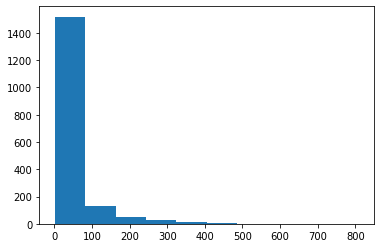

In [35]:
#checking outliers
plt.hist(lab.creatine_kinase_mb_avg)

In [36]:
lab.positive_end_expiratory_pressure_avg.describe()

count    543.000000
mean       6.878027
std        8.895643
min        0.000000
25%        5.000000
50%        5.000000
75%        8.000000
max      203.333333
Name: positive_end_expiratory_pressure_avg, dtype: float64

In [37]:
#Fix features values
lab['creatinine_avg']=np.where(lab['creatinine_avg']>=20,lab['creatinine_avg']/10,lab['creatinine_avg'])
lab['positive_end_expiratory_pressure_avg']=np.where(lab['positive_end_expiratory_pressure_avg']>=100,lab['positive_end_expiratory_pressure_avg']/2,lab['positive_end_expiratory_pressure_avg'])
lab['white_blood_cells_avg']=np.where(lab['white_blood_cells_avg']>=0,lab['white_blood_cells_avg']/10,lab['white_blood_cells_avg'])
lab['creatine_kinase_ck_avg']=np.where(lab['creatine_kinase_ck_avg']>=200,lab['creatine_kinase_ck_avg']/1000,lab['creatine_kinase_ck_avg'])
lab['creatine_kinase_mb_avg']=np.where(lab['creatine_kinase_mb_avg']>=200,lab['creatine_kinase_mb_avg']/1000,lab['creatine_kinase_mb_avg'])

lab['creatinine_max']=np.where(lab['creatinine_max']>=20,lab['creatinine_max']/10,lab['creatinine_max'])
lab['positive_end_expiratory_pressure_max']=np.where(lab['positive_end_expiratory_pressure_max']>=100,lab['positive_end_expiratory_pressure_max']/2,lab['positive_end_expiratory_pressure_max'])
lab['white_blood_cells_max']=np.where(lab['white_blood_cells_max']>=0,lab['white_blood_cells_max']/10,lab['white_blood_cells_max'])
lab['creatine_kinase_ck_max']=np.where(lab['creatine_kinase_ck_max']>=200,lab['creatine_kinase_ck_max']/1000,lab['creatine_kinase_ck_max'])
lab['creatine_kinase_mb_max']=np.where(lab['creatine_kinase_mb_max']>=200,lab['creatine_kinase_mb_max']/1000,lab['creatine_kinase_mb_max'])

lab['creatinine_min']=np.where(lab['creatinine_min']>=20,lab['creatinine_min']/10,lab['creatinine_min'])
lab['positive_end_expiratory_pressure_min']=np.where(lab['positive_end_expiratory_pressure_min']>=100,lab['positive_end_expiratory_pressure_min']/2,lab['positive_end_expiratory_pressure_min'])
lab['white_blood_cells_min']=np.where(lab['white_blood_cells_min']>=0,lab['white_blood_cells_min']/10,lab['white_blood_cells_min'])
lab['creatine_kinase_ck_min']=np.where(lab['creatine_kinase_ck_min']>=200,lab['creatine_kinase_ck_min']/1000,lab['creatine_kinase_ck_min'])
lab['creatine_kinase_mb_min']=np.where(lab['creatine_kinase_mb_min']>=200,lab['creatine_kinase_mb_min']/1000,lab['creatine_kinase_mb_min'])

(array([1061.,  325.,  112.,   93.,   54.,   35.,   25.,   19.,   18.,
          14.]), array([  0.202     ,  20.11513333,  40.02826667,  59.9414    ,
         79.85453333,  99.76766667, 119.6808    , 139.59393333,
        159.50706667, 179.4202    , 199.33333333]), <a list of 10 Patch objects>)

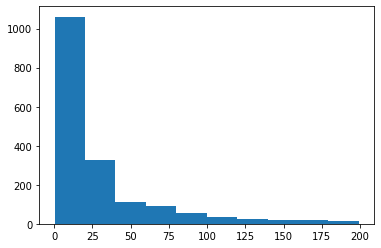

In [38]:
plt.hist(lab.creatine_kinase_mb_avg)

In [39]:
lab.describe()

,subject_id,hadm_id,icustay_id,anion_gap_avg,albumin_avg,bands_avg,creatinine_avg,protein_creatinine_ratio_avg,fibrinogen_avg,uric_acid_avg,...,urea_max,white_blood_cells_max,hematocrit_max,hemoblobin_max,troponin_i_max,troponin_t_max,glucose_max,creactive_max,creatine_kinase_ck_max,creatine_kinase_mb_max
count,2820.000000,2820.00000,2820.000000,2685.000000,744.000000,397.000000,2780.000000,24.000000,577.000000,50.000000,...,2781.000000,2744.000000,986.000000,986.000000,149.000000,1578.000000,1078.000000,23.000000,1977.000000,1756.000000
mean,32924.519149,151312.17234,250485.435816,14.374969,3.103495,5.005080,2.389753,1.987500,309.432377,7.462200,...,32.965840,1.390308,32.508114,10.819067,14.981879,1.804125,191.316327,84.400870,38.356367,31.817647
std,27897.961837,29210.70230,29027.612165,3.630891,0.593016,8.193213,3.220485,2.506741,154.952933,3.791795,...,24.165569,0.793557,5.894886,1.967162,13.342039,3.121778,85.501335,76.924662,56.397432,39.482453
min,3.000000,100036.00000,200066.000000,6.000000,1.100000,0.000000,0.200000,0.100000,75.200000,1.900000,...,3.000000,0.010000,0.000000,0.000000,0.400000,0.010000,60.000000,0.390000,0.200000,0.202000
25%,11794.250000,125440.00000,225436.500000,12.000000,2.700000,0.000000,0.800000,0.475000,199.000000,4.300000,...,16.000000,0.940000,29.000000,9.500000,4.200000,0.250000,147.000000,17.735000,0.443000,7.000000
50%,23409.500000,151110.00000,250560.500000,14.000000,3.100000,1.000000,1.166667,0.750000,269.000000,6.675000,...,25.000000,1.240000,32.000000,10.700000,10.400000,0.740000,174.000000,61.800000,1.531000,16.000000
75%,52228.250000,177705.00000,275569.000000,16.000000,3.500000,6.000000,2.296250,2.800000,382.000000,10.250000,...,42.000000,1.670000,36.000000,12.100000,20.400000,1.830000,208.000000,129.300000,71.000000,38.000000
max,99944.000000,199984.00000,299969.000000,44.428571,4.900000,45.000000,19.933333,9.200000,923.500000,17.800000,...,198.000000,17.600000,50.000000,16.600000,49.300000,26.800000,946.000000,264.300000,199.000000,196.000000


In [40]:
#Renaming names:
lab = lab.rename(columns={'anion_gap_avg': 'Avg. anion gap',
                          'anion_gap_max': 'Max. anion gap',
                          'anion_gap_min': 'Min. anion gap',
                           'albumin_avg':'Avg. albumin',
                           'bands_avg':'Avg. bands',
                           'creatinine_avg':'Avg. creatinine',
                           'protein_creatinine_ratio_avg':'Avg. protein creatinine ratio',
                           'fibrinogen_avg':'Avg. fibrinogen',
                           'uric_acid_avg':'Avg. uric acid',
                           'triglycerides_avg':'Avg. triglycerides',
                           'tidal_volume_avg':'Avg. tidal volume',
                           'positive_end_expiratory_pressure_avg':'Avg. peep',
                           'Eosinophils_avg':'Avg. eosinophils',
                           'neutrophils_avg':'Avg. neutrophils',
                           'lymphocytes_avg':'Avg. lymphocytes',
                           'basophils_avg':'Avg. basophils',
                           'monocytes':'Avg. monocytes',
                           'cholesterol_total_avg':'Avg. cholesterol total',
                           'cholesterol_hdl_avg':'Avg. cholesterol hdl',
                           'cholesterol_ldl_measured_avg':'Avg. cholesterol ldl measured',
                           'hemoglobin_a1c':'Avg. hemoglobin a1c',
                           'platelet_avg':'Avg. platelet',
                           'potassium_avg':'Avg. potassium',
                           'partial_thromboplastin_time_avg':'Avg. partial thromboplastin time',
                           'partial_thromboplastin_time_min':'Min. partial thromboplastin time',
                           'partial_thromboplastin_time_max':'Max. partial thromboplastin time',
                           'international_normalized_ratio_avg':'Avg. international_normalized_ratio',
                           'prothrombin_time_avg':'Avg. prothrombin time',
                           'sodium_avg':'Avg. sodium',
                           'urea_avg':'Avg. urea',
                           'urea_max':'Max. urea',
                           'urea_min':'Min. urea',
                           'white_blood_cells_avg':'Avg. white blood cells',
                           'white_blood_cells_min':'Min. white blood cells',
                           'hematocrit_avg':'Avg. hematocrit',
                           'hemoglobin_avg':'Avg. hemoglobin',
                           'troponin_i_avg':'Avg. troponin I',
                           'troponin_t_avg':'Avg. troponin T',
                           'troponin_t_min':'Min. troponin T',
                           'glucose_avg':'Avg. glucose',
                           'creactive_avg':'Avg. creactive',
                           'creatine_kinase_ck_avg':'Avg. creatine kinase ck',
                           'creatine_kinase_mb_avg':'Avg. creatine kinase mb',})

In [41]:
lab.shape

(2820, 108)

### Vital signs

In [42]:
vital = pd.read_csv("../data/nstemi/vital_sign.csv")
vital.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'heartrate_min', 'heartrate_max',
       'heartrate_avg', 'sysbp_min', 'sysbp_max', 'sysbp_avg', 'diasbp_min',
       'diasbp_max', 'diasbp_avg', 'meanbp_min', 'meanbp_max', 'meanbp_avg',
       'resprate_min', 'resprate_max', 'resprate_avg', 'spo2_min', 'spo2_max',
       'spo2_avg'],
      dtype='object')

(array([3.000e+00, 7.440e+02, 2.042e+03, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([ 72.1875    ,  84.22619681,  96.26489362, 108.30359043,
        120.34228723, 132.38098404, 144.41968085, 156.45837766,
        168.49707447, 180.53577128, 192.57446809]),
 <a list of 10 Patch objects>)

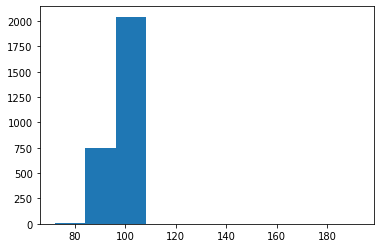

In [43]:
plt.hist(vital.spo2_avg)

In [44]:
#Fix features values
vital['resprate_max']=np.where(vital['resprate_max']>=200,vital['resprate_max']/1000,vital['resprate_max'])
vital['meanbp_max']=np.where(vital['meanbp_max']>=200,vital['meanbp_max']/1000,vital['meanbp_max'])
vital['meanbp_min']=np.where(vital['meanbp_min']<0,0,vital['meanbp_min'])
vital['diasbp_max']=np.where(vital['diasbp_max']>=200,vital['diasbp_max']/1000,vital['diasbp_max'])
vital['diasbp_avg']=np.where(vital['diasbp_avg']>=200,vital['diasbp_avg']/1000,vital['diasbp_avg'])
vital['spo2_max']=np.where(vital['spo2_max']>=200,vital['spo2_max']/1000,vital['spo2_max'])

vital['sysbp_avg']=np.where(vital['sysbp_avg']>=200,vital['sysbp_avg']/1000,vital['sysbp_avg'])
vital['sysbp_max']=np.where(vital['sysbp_max']>=200,vital['sysbp_max']/1000,vital['sysbp_max'])
vital['heartrate_min']=np.where(vital['heartrate_min']<0,0,vital['heartrate_min'])
vital['diasbp_avg']=np.where(vital['diasbp_avg']>=200,vital['diasbp_avg']/1000,vital['diasbp_avg'])

(array([1.000e+00, 0.000e+00, 0.000e+00, 3.200e+01, 4.240e+02, 1.235e+03,
        8.140e+02, 2.300e+02, 5.000e+01, 5.000e+00]),
 array([ 0.37787763, 10.15326352, 19.92864941, 29.7040353 , 39.47942119,
        49.25480708, 59.03019297, 68.80557886, 78.58096475, 88.35635064,
        98.13173653]),
 <a list of 10 Patch objects>)

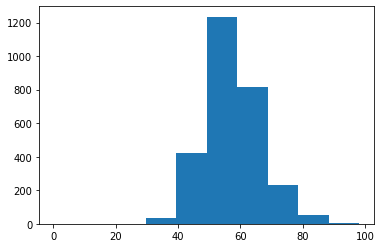

In [45]:
plt.hist(vital.diasbp_avg)

In [48]:
vital.describe()

,subject_id,hadm_id,icustay_id,heartrate_max,heartrate_avg,sysbp_max,sysbp_avg,diasbp_min,diasbp_max,diasbp_avg,meanbp_min,meanbp_max,meanbp_avg,resprate_min,resprate_max,resprate_avg,spo2_avg
count,2820.000000,2820.00000,2820.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000
mean,32924.519149,151312.17234,250485.435816,114.141168,83.162894,143.553916,118.650356,31.570942,92.119699,57.453431,46.849027,104.766943,76.542147,9.076740,33.156989,19.503006,97.048885
std,27897.961837,29210.70230,29027.612165,25.609953,11.898358,48.290793,14.720790,14.671901,23.389781,8.893374,17.173036,36.479318,9.345439,5.059515,11.474664,3.283460,2.892987
min,3.000000,100036.00000,200066.000000,54.000000,46.814815,0.200000,71.526316,-2.000000,0.203000,0.377878,0.000000,0.201000,45.854839,0.000000,0.210000,10.801802,72.187500
25%,11794.250000,125440.00000,225436.500000,96.000000,74.805660,137.000000,107.727827,25.000000,79.000000,51.574217,41.333302,94.833351,70.313383,7.000000,27.000000,17.139962,96.174045
50%,23409.500000,151110.00000,250560.500000,110.000000,83.097561,155.000000,116.911765,34.000000,90.000000,56.714474,50.666698,107.000000,75.681818,10.000000,31.000000,19.236842,97.165217
75%,52228.250000,177705.00000,275569.000000,129.000000,91.000000,170.000000,127.615799,41.000000,102.000000,62.756753,57.000000,122.000000,81.880073,12.000000,37.000000,21.440913,98.059681
max,99944.000000,199984.00000,299969.000000,303.000000,129.280000,199.000000,177.619048,78.000000,199.000000,98.131737,89.000000,199.000000,205.666667,29.000000,180.000000,42.692308,192.574468


In [49]:
#Renaming names:
vital = vital.rename(columns={
                              'heartrate_min': 'Min. heart rate',
                              'heartrate_max': 'Max. heart rate',
                              'heartrate_avg': 'Avg. heart rate',
                              'sysbp_min': 'Min. systolic blood pressure',
                              'sysbp_max': 'Max. systolic blood pressure',
                              'sysbp_avg': 'Avg. systolic blood pressure',
                              'diasbp_min': 'Min. diastolic blood pressure',
                              'diasbp_max': 'Max. diastolic blood pressure',
                              'diasbp_avg': 'Avg. diastolic blood pressure',
                              'meanbp_min': 'Min. mean blood pressure',
                              'meanbp_max': 'Max. mean blood pressure',
                              'meanbp_avg': 'Avg. mean blood pressure',
                              'resprate_min': 'Min. respiratory rate',
                              'resprate_max': 'Max. respiratory rate',
                              'resprate_avg': 'Avg. respiratory rate',
                              'spo2_min': 'Min. SpO2',
                              'spo2_max': 'Max. SpO2',
                              'spo2_avg': 'Avg. SpO2'})

### Pre-processing: treatments data

In [50]:
treats = pd.read_csv("../data/nstemi/treatments.csv")

In [51]:
#Fix multiple rows for each patient
result = treats.groupby(['subject_id','hadm_id','icustay_id'])
treats = result.sum().reset_index()

In [52]:
#One-hot encoding to all variables
treats['beta_blockers']=np.where(treats['beta_blockers']>=1,1,0)
treats['fibrates']=np.where(treats['fibrates']>=1,1,0)
treats['enoxaparin']=np.where(treats['enoxaparin']>=1,1,0)
treats['oral_glucose_low_drugs']=np.where(treats['oral_glucose_low_drugs']>=1,1,0)
treats['arb']=np.where(treats['arb']>=1,1,0)
treats['dobutamine']=np.where(treats['dobutamine']>=1,1,0)
treats['digoxin']=np.where(treats['digoxin']>=1,1,0)
treats['calcium_antagonist']=np.where(treats['calcium_antagonist']>=1,1,0)
treats['dopamine']=np.where(treats['dopamine']>=1,1,0)
treats['insulin']=np.where(treats['insulin']>=1,1,0)
treats['warfarin']=np.where(treats['warfarin']>=1,1,0)
treats['clopidogrel_bisulfate']=np.where(treats['clopidogrel_bisulfate']>=1,1,0)
treats['amiodarone']=np.where(treats['amiodarone']>=1,1,0)
treats['statins']=np.where(treats['statins']>=1,1,0)
treats['oral_nitrates']=np.where(treats['oral_nitrates']>=1,1,0)
treats['ace_inhibitors']=np.where(treats['ace_inhibitors']>=1,1,0)
treats['vancomycin']=np.where(treats['vancomycin']>=1,1,0)
treats['heparin']=np.where(treats['heparin']>=1,1,0)
treats['aspirin']=np.where(treats['aspirin']>=1,1,0)
treats['potassium_chloride']=np.where(treats['potassium_chloride']>=1,1,0)
treats['diuretics']=np.where(treats['diuretics']>=1,1,0)

In [53]:
treats.describe()

,subject_id,hadm_id,icustay_id,aspirin,clopidogrel_bisulfate,enoxaparin,heparin,oral_nitrates,statins,fibrates,...,calcium_antagonist,amiodarone,digoxin,dobutamine,dopamine,oral_glucose_low_drugs,insulin,potassium_chloride,warfarin,vancomycin
count,2820.000000,2820.00000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,...,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000
mean,32924.519149,151312.17234,250485.435816,0.263830,0.101418,0.008156,0.220213,0.131560,0.167730,0.005674,...,0.023404,0.064184,0.016312,0.016312,0.028014,0.004255,0.031915,0.369504,0.028723,0.196809
std,27897.961837,29210.70230,29027.612165,0.440786,0.301936,0.089958,0.414464,0.338072,0.373693,0.075124,...,0.151210,0.245125,0.126695,0.126695,0.165043,0.065105,0.175805,0.482756,0.167058,0.397657
min,3.000000,100036.00000,200066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11794.250000,125440.00000,225436.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23409.500000,151110.00000,250560.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52228.250000,177705.00000,275569.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,99944.000000,199984.00000,299969.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Pre-processing: Hemodynamic data

In [54]:
hemo = pd.read_csv("../data/nstemi/hemodynamic.csv")
hemo.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'cardiac_out_min',
       'cardiac_out_max', 'intra_craneal_pressure_min',
       'intra_craneal_pressure_max', 'pap_systolic_min', 'pap_systolic_max',
       'pap_diastolic_min', 'pap_diastolic_max', 'pap_mean_min',
       'pap_mean_max', 'lap_min', 'lap_max', 'cvp_min', 'cvp_max', 'co_min',
       'co_max', 'lvap_min', 'lvap_max', 'rvap_min', 'rvap_max', 'ef_cco_min',
       'ef_cco_max', 'pcwp_min', 'pcwp_max', 'svo2_min', 'svo2_max',
       'pa_line_min', 'pa_line_max', 'vad_beat_rate_r_min',
       'vad_beat_rate_r_max', 'vad_beat_rate_l_min', 'vad_beat_rate_l_max'],
      dtype='object')

In [55]:
#removing columns with 90% missing values
hemo=hemo.drop(['ef_cco_max','ef_cco_min','lap_min','lap_max',
               'pa_line_min','pa_line_max','lvap_max',
               'rvap_min','rvap_max','vad_beat_rate_l_max',
               'lvap_min','vad_beat_rate_r_max',
               'vad_beat_rate_r_min','vad_beat_rate_l_min'],axis=1)

(array([ 2.,  0.,  1.,  1.,  0.,  0.,  2., 11.,  1.,  1.]),
 array([-11. ,  -9.5,  -8. ,  -6.5,  -5. ,  -3.5,  -2. ,  -0.5,   1. ,
          2.5,   4. ]),
 <a list of 10 Patch objects>)

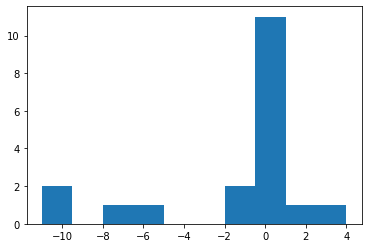

In [56]:
#Checking outliers
plt.hist(hemo.intra_craneal_pressure_min)

In [57]:
#Fix features values
hemo['intra_craneal_pressure_min']=np.where(hemo['intra_craneal_pressure_min']<0,0,hemo['intra_craneal_pressure_min'])
hemo['pap_mean_min']=np.where(hemo['pap_mean_min']<0,0,hemo['pap_mean_min'])
hemo['pap_mean_max']=np.where(hemo['pap_mean_max']<0,0,hemo['pap_mean_max'])

hemo['cvp_min']=np.where(hemo['cvp_min']<0,0,hemo['cvp_min'])
hemo['cvp_max']=np.where(hemo['cvp_max']>0,hemo['cvp_max']/10000,hemo['cvp_max'])

(array([17.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

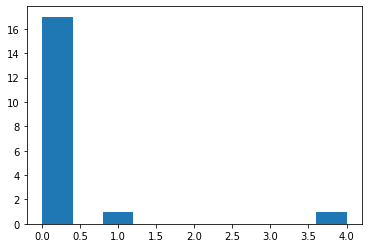

In [58]:
#Checking outliers
plt.hist(hemo.intra_craneal_pressure_min)

In [59]:
#Renaming names:
hemo = hemo.rename(columns={'cardiac_out_min':'Min. cardiac out',
                             'cardiac_out_max':'Max. cardiac out',
                             'intra_craneal_pressure_min':'Min. intra craneal pressure',
                             'intra_craneal_pressure_max':'Max. intra craneal pressure',
                             'pap_systolic_min':'Min. pap systolic',
                             'pap_systolic_max':'Max. pap systolic',
                             'pap_diastolic_min':'Min. pap diastolic',
                             'pap_diastolic_max':'Max. pap diastolic',
                             'pap_mean_min':'Min. pap mean',
                             'pap_mean_max':'Max. pap mean',
                             'lap_min':'Min. lap',
                             'lap_max':'Max. lap',
                             'cvp_min':'Min. cvp',
                             'cvp_max':'Max. cvp',
                             'co_min':'Min. co',
                             'co_max':'Max. co',
                             'lvap_min':'Min. lvap',
                             'lvap_max':'Max. lvap',
                             'rvap_min':'Min. rvap',
                             'rvap_max':'Max. rvap',
                             'ef_cco_min':'Min. ef cco',
                             'ef_cco_max':'Max. ef cco',
                             'pcwp_min':'Min. pcwp',
                             'pcwp_max':'Max. pcwp',
                             'svo2_min':'Min. svo2',
                             'svo2_max':'Max. svo2',
                             'pa_line_min':'Min. pa line',
                             'pa_line_max':'Max. pa line',
                             'vad_beat_rate_r_min':'Min. vad beat rate r',
                             'vad_beat_rate_r_max':'Max. vad beat rate r',
                             'vad_beat_rate_l_min':'Min. vad beat rate l',
                             'vad_beat_rate_l_max':'Max. vad beat rate l',})

## Summary

In [60]:
print("Demographic data:",demo.shape)
print("Complications:",complications.shape)
print("Procedures:",proc.shape)
print("Arterial blood gas:",blood_gas.shape)
print("Laboratory results:",lab.shape)
print("Vital signs:",vital.shape)
print("Treatments:",treats.shape)
print("Hemodynamic:",hemo.shape)

Demographic data: (2820, 14)
Complications: (2820, 40)
Procedures: (2820, 20)
Arterial blood gas: (2820, 45)
Laboratory results: (2820, 108)
Vital signs: (2820, 17)
Treatments: (2820, 24)
Hemodynamic: (2820, 21)


## Sección: train_test_split
For each clinical set, we divided them in two datasets: train (80%) and test (20%)

In [61]:
from sklearn.model_selection import train_test_split

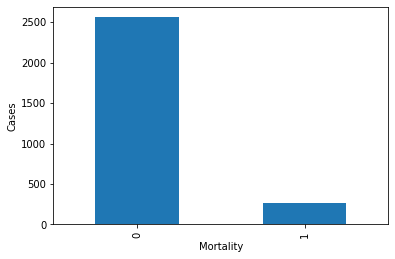

In [62]:
#Loading label data
label = pd.read_csv("../data/nstemi/label.csv") #icustay_expire_flag
#Exploring icustay_expire_flag
cpdel = label.icustay_expire_flag.value_counts().plot(kind='bar')
plt.xlabel('Mortality')
plt.ylabel('Cases')
plt.show()

In [63]:
def split_data(data,label):
    "Function to split data in train and test sets"
    #columns = data.columns
    xtrain, xtest, ytrain, ytest = train_test_split(data, label, test_size=0.20, random_state=242)   
    return xtrain, xtest, ytrain, ytest

In [64]:
xtrain_demo, xtest_demo, ytrain_demo, ytest_demo = split_data(demo,label)
xtrain_comp, xtest_comp, ytrain_comp, ytest_comp = split_data(complications,label)
xtrain_proc, xtest_proc, ytrain_proc, ytest_proc = split_data(proc,label)
xtrain_blood_gas, xtest_blood_gas, ytrain_blood_gas, ytest_blood_gas = split_data(blood_gas,label)
xtrain_lab, xtest_lab, ytrain_lab, ytest_lab = split_data(lab,label)
xtrain_vital, xtest_vital, ytrain_vital, ytest_vital = split_data(vital,label)
xtrain_treats, xtest_treats, ytrain_treats, ytest_treats = split_data(treats,label)
xtrain_hemo, xtest_hemo, ytrain_hemo, ytest_hemo = split_data(hemo,label)

## Imputation

In [65]:
from sklearn.impute import SimpleImputer
def imputer(xtrain,xtest):
    "Function to impute by mean"
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean').fit(xtrain)
    xtrain = np.round(imputer.transform(xtrain),3)
    xtest = np.round(imputer.transform(xtest),3)
    return xtrain,xtest

In [66]:
xtrain_demo, xtest_demo = imputer(xtrain_demo, xtest_demo)
xtrain_comp, xtest_comp = imputer(xtrain_comp, xtest_comp)
xtrain_proc, xtest_proc = imputer(xtrain_proc, xtest_proc)
xtrain_blood_gas, xtest_blood_gas = imputer(xtrain_blood_gas, xtest_blood_gas)
xtrain_lab, xtest_lab = imputer(xtrain_lab, xtest_lab)
xtrain_vital, xtest_vital = imputer(xtrain_vital, xtest_vital)
xtrain_treats, xtest_treats = imputer(xtrain_treats, xtest_treats)
xtrain_hemo, xtest_hemo = imputer(xtrain_hemo, xtest_hemo)

In [67]:
def saving_data(data,xtrain,xtest,ytrain,ytest,filename,path):
    "Function to save datasets"
    columns = data.columns
    xtrain = pd.DataFrame(xtrain,columns=columns)
    xtest = pd.DataFrame(xtest,columns=columns)
    ytrain = pd.DataFrame(ytrain,columns=['icustay_expire_flag'])
    ytest = pd.DataFrame(ytest,columns=['icustay_expire_flag'])
    
    xtrain.to_csv(path+"xtrain_"+str(filename)+".csv")
    xtest.to_csv(path+"xtest_"+str(filename)+".csv")
    ytrain.to_csv(path+"ytrain_"+str(filename)+".csv")
    ytest.to_csv(path+"ytest_"+str(filename)+".csv")

### Creating "combined dataset"

In [68]:
saving_data(demo,xtrain_demo,xtest_demo,ytrain_demo,ytest_demo,"demo",'../data/nstemi/')
saving_data(complications,xtrain_comp, xtest_comp, ytrain_comp, ytest_comp,"complications",'../data/nstemi/')
saving_data(proc,xtrain_proc, xtest_proc, ytrain_proc, ytest_proc,"proc",'../data/nstemi/')
saving_data(blood_gas,xtrain_blood_gas, xtest_blood_gas, ytrain_blood_gas, ytest_blood_gas,"blood_gas",'../data/nstemi/')
saving_data(lab,xtrain_lab, xtest_lab, ytrain_lab, ytest_lab,"lab",'../data/nstemi/')
saving_data(vital,xtrain_vital, xtest_vital, ytrain_vital, ytest_vital,"vital",'../data/nstemi/')
saving_data(treats,xtrain_treats, xtest_treats, ytrain_treats, ytest_treats,"treats",'../data/nstemi/')
saving_data(hemo,xtrain_hemo, xtest_hemo, ytrain_hemo, ytest_hemo,"hemo",'../data/nstemi/')

In [69]:
#Concat demo + complications+procedures+blood_gas+lab+vital+treats+hemo
combined = pd.concat([demo,complications,proc,treats,blood_gas,lab,vital,hemo])
combined

,subject_id,hadm_id,icustay_id,Length of stay,adm_elective,adm_emergency,adm_urgent,status_divorced,status_married,status_single,...,Min. pap mean,Max. pap mean,Min. cvp,Max. cvp,Min. co,Max. co,Min. pcwp,Max. pcwp,Min. svo2,Max. svo2
0,3,145834,211552,6.0646,0.0,1.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21,109451,217847,5.9017,0.0,1.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25,129635,203487,3.5466,0.0,1.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37,188670,213503,1.1397,0.0,1.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,107,182383,252542,1.0806,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815,99538,194801,279848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,62.0,4.0,0.0021,NaN,NaN,NaN,NaN,67.0,84.0
2816,99562,101705,223539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.0,55.0,0.0,0.0021,NaN,NaN,15.0,22.0,72.0,72.0
2817,99809,154672,214592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,38.0,1.0,0.0020,4.25,7.97,NaN,NaN,NaN,NaN
2818,99817,195557,297406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,0.0022,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
#Fix multiple rows for each patient
result = combined.groupby(['subject_id','hadm_id','icustay_id'])
combined = result.sum().reset_index()

<bound method NDFrame.describe of       subject_id  hadm_id  icustay_id  Length of stay  adm_elective  \
0              3   145834      211552          6.0646           0.0   
1             21   109451      217847          5.9017           0.0   
2             25   129635      203487          3.5466           0.0   
3             37   188670      213503          1.1397           0.0   
4            107   182383      252542          1.0806           0.0   
...          ...      ...         ...             ...           ...   
2815       99538   194801      279848          9.9622           0.0   
2816       99562   101705      223539         11.4059           0.0   
2817       99809   154672      214592          1.2469           1.0   
2818       99817   195557      297406          2.8195           0.0   
2819       99944   185654      221067          4.0542           0.0   

      adm_emergency  adm_urgent  status_divorced  status_married  \
0               1.0         0.0              

In [73]:
combined.describe()

,subject_id,hadm_id,icustay_id,Length of stay,adm_elective,adm_emergency,adm_urgent,status_divorced,status_married,status_single,...,Min. pap mean,Max. pap mean,Min. cvp,Max. cvp,Min. co,Max. co,Min. pcwp,Max. pcwp,Min. svo2,Max. svo2
count,2820.000000,2820.00000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,...,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000
mean,32924.519149,151312.17234,250485.435816,5.128446,0.039362,0.918440,0.042199,0.057801,0.529787,0.146454,...,5.116312,11.690071,2.030571,0.002904,0.193152,0.306372,1.505319,2.279787,2.631206,3.752482
std,27897.961837,29210.70230,29027.612165,6.171771,0.194488,0.273742,0.201078,0.233409,0.499200,0.353623,...,18.204018,28.764121,3.241834,0.020320,0.890233,1.402547,5.332070,7.554655,11.792646,16.576986
min,3.000000,100036.00000,200066.000000,1.000200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11794.250000,125440.00000,225436.500000,1.889400,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23409.500000,151110.00000,250560.500000,3.109850,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52228.250000,177705.00000,275569.000000,5.687125,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,3.000000,0.002100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,99944.000000,199984.00000,299969.000000,61.021300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,349.000000,349.000000,35.000000,1.026300,9.380000,11.800000,66.000000,79.000000,78.000000,95.000000


In [71]:
#split combined_set
xtrain_combined, xtest_combined, ytrain_combined, ytest_combined = split_data(combined,label)
#saving data
saving_data(combined,xtrain_combined, xtest_combined, ytrain_combined, ytest_combined,"combined",'../data/nstemi/')